In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
movie_data = pd.read_csv('/Users/mucheng/Datasets/movie_lens_genre_separated.tsv', sep='\t')


In [53]:
movie_data["age_group"] = movie_data.age.copy()
movie_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation,25
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's,25
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy,25
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation,18
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's,18


Formatting the Occupations and Age Groups


In [54]:

occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [56]:
movie_data['age_group'] = [age_dict[x] for x in movie_data['age_group']]
movie_data['occupation'] = [occupation_dict[x] for x in movie_data['occupation']]


In [92]:
movie_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,2917,2355,2,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",Animation,25-34
1,2917,2355,2,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",Children's,25-34
2,2917,2355,2,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",Comedy,25-34
3,2924,2355,4,971592069,F,18,college/grad student,94121,"Bug's Life, A (1998)",Animation,18-24
4,2924,2355,4,971592069,F,18,college/grad student,94121,"Bug's Life, A (1998)",Children's,18-24


## TASK1: An aggregate (e.g., average) of the movie ratings for each particular genre

In [58]:
mean_ratings = movie_data.pivot_table(index='genres', values='rating', aggfunc='mean')
mean_ratings

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


## Task 2: The top 5 highest ranked genre by occupation.

In [59]:
genres_by_occupations = movie_data.pivot_table(index='genres', values='rating', columns='occupation',aggfunc='mean')
genres_by_occupations.head()


occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genres,,,,,,,,,,,,,,,,,,,,,
Action,3.497116,3.392063,3.457569,3.549025,3.453687,3.494995,3.564004,3.568687,3.449309,3.601525,...,3.417847,3.575455,3.679048,3.528136,3.559685,3.510326,3.567827,3.475220,3.310577,3.339971
Adventure,3.425658,3.424278,3.443535,3.556486,3.419877,3.478934,3.553981,3.509195,3.397727,3.688992,...,3.425616,3.564958,3.650803,3.520496,3.567662,3.513258,3.560600,3.430316,3.287975,3.346110
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.674843,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.438479,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.492581,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011


In [60]:
for occu in genres_by_occupations.columns:
    t5_genres = genres_by_occupations.pivot_table(index='genres', values=occu).sort_values(by=occu, ascending=False)
    t5_genres = t5_genres.head()
    print(t5_genres, "\n")

occupation  K-12 student
genres                  
Film-Noir       4.212766
War             3.880144
Drama           3.782167
Crime           3.687085
Mystery         3.636612 

occupation   academic/educator
genres                        
Film-Noir             4.082613
Documentary           3.984887
War                   3.882950
Drama                 3.754293
Musical               3.701586 

occupation     artist
genres               
Film-Noir    4.114000
Documentary  4.028933
War          3.859375
Drama        3.732216
Mystery      3.719645 

occupation   clerical/admin
genres                     
Film-Noir          4.075332
War                3.927692
Musical            3.857049
Documentary        3.852632
Animation          3.822104 

occupation   college/grad student
genres                           
Film-Noir                4.039548
Documentary              3.962887
War                      3.864107
Drama                    3.748794
Crime                    3.723450 

occupation

## Task 3: The most popular (with most ratings) movie by age group.
Notes: most ratings == number of people who give rating

In [94]:
movie_data_subset = movie_data.drop(['genres','rating'], axis=1).drop_duplicates()


In [95]:
movie_data_subset.insert(9, "counting", 1)
movie_data_subset 
# movie_data_subset

,user_id,movie_id,timestamp,gender,age,occupation,zip,title,age_group,counting
0,2917,2355,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",25-34,1
3,2924,2355,971592069,F,18,college/grad student,94121,"Bug's Life, A (1998)",18-24,1
6,2933,2355,971487346,M,35,lawyer,32082,"Bug's Life, A (1998)",35-44,1
9,2934,2355,971493883,F,35,writer,91324,"Bug's Life, A (1998)",35-44,1
12,2935,2355,977019765,M,25,not specified,55126,"Bug's Life, A (1998)",25-34,1
...,...,...,...,...,...,...,...,...,...,...
2101838,5949,2198,958846401,M,18,technician/engineer,47901,Modulations (1998),18-24,1
2101839,5675,2703,976029116,M,35,sales/marketing,30030,Broken Vessels (1998),35-44,1
2101840,5780,2845,958153068,M,18,technician/engineer,92886,White Boys (1999),18-24,1
2101841,5851,3607,957756608,F,18,writer,55410,One Little Indian (1973),18-24,1


In [63]:
most_popular_movie_by_AG = movie_data_subset.pivot_table(index='title', columns='age_group', values='counting', aggfunc=sum)
most_popular_movie_by_AG.idxmax()

age_group
18-24                          American Beauty (1999)
25-34                          American Beauty (1999)
35-44       Star Wars: Episode IV - A New Hope (1977)
45-49                          American Beauty (1999)
50-55                          American Beauty (1999)
56+                            American Beauty (1999)
Under 18                             Toy Story (1995)
dtype: object

In [64]:
for age in most_popular_movie_by_AG.columns:
    most_rated_movie = most_popular_movie_by_AG.pivot_table(index='title', values=age).sort_values(by=age, ascending=False)
    print(most_rated_movie.idxmax(), "\n")

age_group
18-24    American Beauty (1999)
dtype: object 

age_group
25-34    American Beauty (1999)
dtype: object 

age_group
35-44    Star Wars: Episode IV - A New Hope (1977)
dtype: object 

age_group
45-49    American Beauty (1999)
dtype: object 

age_group
50-55    American Beauty (1999)
dtype: object 

age_group
56+    American Beauty (1999)
dtype: object 

age_group
Under 18    Toy Story (1995)
dtype: object 



Get the max values in each row and find their matching colum names.
Inspirations coming from: https://thispointer.com/pandas-find-maximum-values-position-in-columns-or-rows-of-a-dataframe/

## Task 4: A breakdown of a movie’s ratings by occupation, using any movie of your choice.

In [65]:
import random
a = list(movie_data.title.unique())
r_movie = random.choice(a)
r_movie


'Cabin Boy (1994)'

In [66]:
r_movie_df = movie_data[movie_data["title"] == r_movie] 
movie_by_occu_df = r_movie_df.pivot_table(index='occupation', values='rating') 
movie_by_occu_df

,rating
occupation,
K-12 student,2.833333
academic/educator,2.187500
artist,2.333333
clerical/admin,2.166667
college/grad student,2.400000
customer service,2.875000
doctor/health care,1.625000
executive/managerial,1.950000
homemaker,3.000000


## Task 5: A function that given a user id, returns: (1) this user’s age and occupation, (2) the average rating given by this user, and (3) his highest and lowest rated movie(s)

In [67]:
def user_info(user_id):
    user_info = movie_data[movie_data['user_id']== user_id]
    # age
    user_age = user_info.age[0] #or use .unique()
    # occupation
    user_occupation = user_info.occupation[0] #or use .unique()
    # overall AVG rating
    user_avg_rating = user_info.rating.mean()
    # highest/lowest rated movie(s)
    highest_movie_rate = user_info.rating.max()
    highest_rated_movie_list = user_info[user_info['rating']== highest_movie_rate]
    highest_rated_movie_list = highest_rated_movie_list.title.unique() 
    # lowest/lowest rated movie(s)
    lowest_movie_rate = user_info.rating.min()
    lowest_rated_movie_list = user_info[user_info['rating']== lowest_movie_rate]
    lowest_rated_movie_list = lowest_rated_movie_list.title.unique() 
    
    print("USER_ID: " + str(user_id) + "\n" + 
          "User Age: " + str(user_age) + "\n" +
         "Occupation: " + user_occupation + "\n" + 
         "Average Rating: " + str(user_avg_rating) + " \n" +
         "Highest Rated Movie List: " +  ', '.join(map(str,highest_rated_movie_list)) + " \n" + 
         "Lowest Rated Movie List: " + ', '.join(map(str,lowest_rated_movie_list)))

    
#     return user_age, user_occupation, user_avg_rating, highest_rated_movie_list, lowest_rated_movie_list


In [68]:
user_info(2917)

USER_ID: 2917
User Age: 25
Occupation: not specified
Average Rating: 3.423611111111111 
Highest Rated Movie List: Fargo (1996), Raiders of the Lost Ark (1981), Pulp Fiction (1994), Crumb (1994), North by Northwest (1959), Hard-Boiled (Lashou shentan) (1992), Rear Window (1954), Citizen Kane (1941), Blade Runner (1982), Annie Hall (1977), Vertigo (1958), Killer, The (Die xue shuang xiong) (1989), Strangers on a Train (1951), City Lights (1931), Raging Bull (1980), Fandango (1985), Paradise Lost: The Child Murders at Robin Hood Hills (1996) 
Lowest Rated Movie List: Arachnophobia (1990), Entrapment (1999)


## Task 6: Some other statistic, chart/visualization, data aggregation, or figure that you created using this dataset, along with a short description of what interesting observations you derived from it.

Graph.1. Given the number of lawyers who rated the movies, this graph shows the distribution of number of ratings are made by lawyers in different age groups. This will help analyze in which particular age group that lawyers have watched most movies among others so the movie industry analyst could make further understanding such as genres or specific movies that are most favorable. 

Text(0.5, 1.0, 'Number of Lawyer Users by Age')

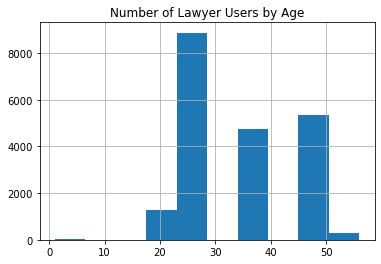

In [69]:
movie_data_subset_lawyer = movie_data_subset.loc[movie_data_subset['occupation'] == 'lawyer']
movie_data_subset_lawyer["age"].hist()
plt.title("Number of Lawyer Users by Age")

Challenging Choropleth Map to be Solved

zip information from: https://simplemaps.com/data/us-zips

Graph 2. Made a simple marker on a world map that shows where this particular user is located. A few functions such as finding the US zip code data, combining two datasets, using Folium to plot map, and others are used to generate this graph.

In [96]:
zipcode_data_original = pd.read_csv('/Users/mucheng/Datasets/uszips.csv')
zipcode_data_original.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.76, ""72141"": 1.24}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.28, ""72153"": 11.67, ""72121"": 6.05}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [97]:
zipcode_data = zipcode_data_original[['zip','lat','lng','state_id','city']]
# zipcode_lat_data['zip'] = pd.to_numeric(zipcode_lat_data['zip'])
zipcode_data.head()

,zip,lat,lng,state_id,city
0,601,18.18027,-66.75266,PR,Adjuntas
1,602,18.36075,-67.17541,PR,Aguada
2,603,18.45744,-67.12225,PR,Aguadilla
3,606,18.16585,-66.93716,PR,Maricao
4,610,18.29110,-67.12243,PR,Anasco


In [98]:
zipcode_data['zip'] = zipcode_data['zip'].map(str)
zipcode_data.head()

/var/folders/dw/_3hp0rfn7rngzth_1dc9rh280000gn/T/ipykernel_4583/2176509446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_data['zip'] = zipcode_data['zip'].map(str)


,zip,lat,lng,state_id,city
0,601,18.18027,-66.75266,PR,Adjuntas
1,602,18.36075,-67.17541,PR,Aguada
2,603,18.45744,-67.12225,PR,Aguadilla
3,606,18.16585,-66.93716,PR,Maricao
4,610,18.29110,-67.12243,PR,Anasco


In [99]:
movie_data_subset['zip'] = movie_data_subset['zip'].str[:5]
movie_data_subset

,user_id,movie_id,timestamp,gender,age,occupation,zip,title,age_group,counting
0,2917,2355,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",25-34,1
3,2924,2355,971592069,F,18,college/grad student,94121,"Bug's Life, A (1998)",18-24,1
6,2933,2355,971487346,M,35,lawyer,32082,"Bug's Life, A (1998)",35-44,1
9,2934,2355,971493883,F,35,writer,91324,"Bug's Life, A (1998)",35-44,1
12,2935,2355,977019765,M,25,not specified,55126,"Bug's Life, A (1998)",25-34,1
...,...,...,...,...,...,...,...,...,...,...
2101838,5949,2198,958846401,M,18,technician/engineer,47901,Modulations (1998),18-24,1
2101839,5675,2703,976029116,M,35,sales/marketing,30030,Broken Vessels (1998),35-44,1
2101840,5780,2845,958153068,M,18,technician/engineer,92886,White Boys (1999),18-24,1
2101841,5851,3607,957756608,F,18,writer,55410,One Little Indian (1973),18-24,1


In [120]:
movie_zip_data = pd.merge(movie_data_subset,zipcode_data, on='zip', how='left')
movie_zip_data.dropna()


,user_id,movie_id,timestamp,gender,age,occupation,zip,title,age_group,counting,lat,lng,state_id,city
0,2917,2355,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",25-34,1,42.05665,-87.69827,IL,Evanston
1,2924,2355,971592069,F,18,college/grad student,94121,"Bug's Life, A (1998)",18-24,1,37.77849,-122.49548,CA,San Francisco
2,2933,2355,971487346,M,35,lawyer,32082,"Bug's Life, A (1998)",35-44,1,30.12488,-81.36577,FL,Ponte Vedra Beach
3,2934,2355,971493883,F,35,writer,91324,"Bug's Life, A (1998)",35-44,1,34.23855,-118.55015,CA,Northridge
4,2935,2355,977019765,M,25,not specified,55126,"Bug's Life, A (1998)",25-34,1,45.08614,-93.13581,MN,Saint Paul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,958846401,M,18,technician/engineer,47901,Modulations (1998),18-24,1,40.41780,-86.88995,IN,Lafayette
1000205,5675,2703,976029116,M,35,sales/marketing,30030,Broken Vessels (1998),35-44,1,33.77210,-84.29135,GA,Decatur
1000206,5780,2845,958153068,M,18,technician/engineer,92886,White Boys (1999),18-24,1,33.89517,-117.80154,CA,Yorba Linda
1000207,5851,3607,957756608,F,18,writer,55410,One Little Indian (1973),18-24,1,44.91364,-93.31725,MN,Minneapolis


In [103]:
import folium

In [123]:
map_a = folium.Map(location=[42.05665, -87.69827],
                  zoom_start=2)

city = movie_zip_data.loc[0]

folium.Marker(
    location=[city['lat'],city['lng']],
    popup=city['city']
).add_to(map_a)
map_a